In [2]:
#First of all import the necessary files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
#lets import the data
url = "https://gist.githubusercontent.com/sarchak/b87ad2be315ce05f7a047550646f3c41/raw/0c7d83608111f74f212398fc0d2a704e4f8dc499/diamonds.csv"
df = pd.read_csv(url)

### Section 1 Exploratory Data Analysis (EDA)

In [4]:
#lets dispaly the dataframe
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
#check for null values if any
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# Q1 lets find the median price of the entire dataset.
median_price=np.median(df["price"])
print(median_price)

2401.0


In [7]:
# Q2 Lets find the mean price.
mean_price=np.mean(df["price"])
print(mean_price)

3932.799721913237


In [8]:
# Q3 Now lets find the median price in between carate 1.5 and 3.0
df_in_between=df.loc[(df["carat"] > 1.5) & (df["carat"] <3.0)]
median_price_in_btw=np.median(df_in_between["price"])
median_price_in_btw

12549.0

In [9]:
# Q4 Now count the premium cut diamond with clarity of VVS1 or I1 or IF
df_in_Premium_VVS1_I1_IF=df.loc[(df["cut"] =="Premium") & ((df["clarity"] =="VVS1") | (df["clarity"] =="I1") | (df["clarity"] =="IF"))]
df_in_Premium_VVS1_I1_IF["cut"].count()

1051

In [10]:
# Q5 Now lets find the mean carat size of diamond between price $3500 - $7000
df_in_between_price=df.loc[(df["price"] > 3500) & (df["carat"] <7000)]
mean_carat_size_between_price= np.mean(df_in_between_price["carat"])
mean_carat_size_between_price

1.2698143656716026

In [11]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
#Lets set new index
df_new_index=df.set_index(["cut","color","clarity"])
df_new_index

,,,carat,depth,table,price,x,y,z
cut,color,clarity,,,,,,,
Ideal,E,SI2,0.23,61.5,55.0,326,3.95,3.98,2.43
Premium,E,SI1,0.21,59.8,61.0,326,3.89,3.84,2.31
Good,E,VS1,0.23,56.9,65.0,327,4.05,4.07,2.31
Premium,I,VS2,0.29,62.4,58.0,334,4.20,4.23,2.63
Good,J,SI2,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
Ideal,D,SI1,0.72,60.8,57.0,2757,5.75,5.76,3.50
Good,D,SI1,0.72,63.1,55.0,2757,5.69,5.75,3.61
Very Good,D,SI1,0.70,62.8,60.0,2757,5.66,5.68,3.56


In [13]:
# lets calculate mean of price by using groupby and obtain the desired output 
Pd_series=df_new_index.groupby(["cut","color","clarity"]).price.mean()
df_final_priced=Pd_series.unstack(2)
df_final_priced

clarity                   I1            IF          SI1          SI2  \
cut       color                                                        
Fair      D      7383.000000   1619.666667  4273.344828  4355.142857   
          E      2095.222222           NaN  3901.153846  4172.384615   
          F      2543.514286   2344.000000  3784.686747  4520.112360   
          G      3187.471698   1488.000000  3579.362319  5665.150000   
          H      4212.961538           NaN  5195.800000  6022.406593   
          I      3501.000000           NaN  4574.966667  6658.022222   
          J      5795.043478           NaN  4553.928571  5131.814815   
Good      D      3490.750000  10030.333333  3021.172996  3595.295964   
          E      4398.130435   1519.222222  3162.132394  3785.490099   
          F      2569.526316   3132.866667  3261.454212  4426.786070   
          G      3195.789474   4060.136364  4129.328502  4776.411043   
          H      3849.714286   5948.750000  4179.285106  5529.778481   
          I      4175.444444   1749.333333  4742.945455  6933.012346   
          J      3794.500000   2738.000000  4627.625000  5306.113208   
Ideal     D      3526.923077   6567.178571  2490.459350  3142.047753   
          E      3559.388889   3258.936709  2883.808094  3891.302772   
          F      3903.452381   2153.708955  3710.322368  4335.507726   
          G      4044.437500   2206.030550  3441.107576  4612.086420   
          H      5415.184211   1982.765487  4769.988204  5589.473333   
          I      4103.294118   1502.621053  5178.565476  7191.912409   
          J      9454.000000   2489.000000  5115.674897  6555.172727   
Premium   D      3818.750000   9056.500000  3236.377698  4351.085511   
          E      3199.266667   4525.444444  3362.625407  4489.930636   
          F      3554.558824   3617.580645  4040.467105  4747.089866   
          G      4051.521739   3311.114943  4303.348057  5617.205285   
          H      3904.347826   3384.750000  5707.722137  6718.946257   
          I      5044.625000   2358.565217  6092.092643  7148.483974   
          J      4577.230769   7026.000000  5726.578947  7550.285714   
Very Good D      2622.800000  10298.260870  3234.931174  4425.458599   
          E      3443.545455   4332.744186  3228.175719  4279.447191   
          F      4252.923077   4677.074627  3574.291592  4249.758017   
          G      3194.812500   3525.240506  3481.871308  4699.269113   
          H      5258.833333   2647.689655  4933.945155  6112.413994   
          I      6045.125000   4093.894737  5195.301676  6621.600000   
          J      4478.375000   1074.125000  5026.543956  5992.898438   

clarity                  VS1          VS2         VVS1         VVS2  
cut       color                                                      
Fair      D      2921.200000  4512.880000  4473.000000  3607.000000  
          E      3307.928571  3041.714286  4115.333333  3119.307692  
          F      4103.060606  3400.471698  4679.800000  4018.200000  
          G      3497.622222  5384.444444  2216.333333  3099.058824  
          H      4604.750000  5110.926829  4115.000000  3481.727273  
          I      4500.480000  3856.125000  4194.000000  2994.625000  
          J      5906.187500  4067.826087  1691.000000  2998.000000  
Good      D      3556.581395  3588.461538  2586.230769  2345.640000  
          E      3712.775281  3772.018750  1905.953488  3390.153846  
          F      2787.507576  3790.543478  2189.514286  3192.360000  
          G      4302.427632  4140.713542  2705.195122  3310.466667  
          H      3819.116883  4433.043478  1719.709677  2428.000000  
          I      4597.165049  5956.563636  2650.954545  2758.000000  
          J      3662.826923  4803.166667  4633.000000  4371.153846  
Ideal     D      2576.039886  2111.927174  2705.777778  3619.014085  
          E      2175.797639  2163.323944  2205.519403  2556.335306  
          F      3504.001623  3317.204778  2611.234091  3323.628846  
     

In [14]:
#Heat map
cm=sns.light_palette("green",as_cmap=True )
df_final_priced.astype("float").style.background_gradient(cmap=cm)

#Q1 
Least quality colored diamond "J" with ideal cuttting has the second highest overall mean price .And it also has highest  overall mean price among all the colored diamond having clarity of "I1".

Q2 Here the cutting of the diamond and color of the diamond doest affect the mean price when the clarity remains same.  

#Q3
"Very Good" cutted diamond with color "D" and clarity "I1" have highest overall mean price. 

In [15]:
#Now lets calculate the same with carate
# lets calculate mean of price by using groupby and obtain the desired output 
Pd_series_carat=df_new_index.groupby(["cut","color","clarity"]).carat.mean()
df_final_priced_carat=Pd_series_carat.unstack(2)
df_final_priced_carat

clarity                I1        IF       SI1       SI2       VS1       VS2  \
cut       color                                                               
Fair      D      1.877500  0.380000  0.913793  1.016964  0.630000  0.843600   
          E      0.968889       NaN  0.867077  1.015641  0.632857  0.690238   
          F      1.023429  0.555000  0.864096  1.080112  0.804848  0.758679   
          G      1.226415  0.455000  0.909565  1.262000  0.774222  0.977778   
          H      1.498654       NaN  1.112267  1.364396  0.975937  1.036829   
          I      1.322941       NaN  1.108000  1.511556  1.010400  0.953125   
          J      1.993478       NaN  1.181071  1.316667  1.229375  1.032609   
Good      D      1.040000  0.786667  0.700802  0.858251  0.663256  0.702500   
          E      1.330870  0.373333  0.723859  0.882574  0.680674  0.739375   
          F      0.976316  0.533333  0.768278  1.002537  0.624621  0.752120   
          G      1.174211  0.648182  0.883816  1.086933  0.779211  0.815677   
          H      1.252143  0.935000  0.906723  1.173544  0.779870  0.877971   
          I      1.410000  0.530000  1.015273  1.424815  0.926602  1.129636   
          J      1.370000  0.690000  1.125795  1.318868  0.875000  1.114333   
Ideal     D      0.960000  0.615714  0.594797  0.750309  0.533504  0.499293   
          E      1.037778  0.457722  0.670627  0.874414  0.503592  0.521136   
          F      1.107857  0.411493  0.769605  0.932185  0.644042  0.632241   
          G      1.168750  0.454705  0.760258  0.976111  0.717146  0.769703   
          H      1.475526  0.474602  0.937208  1.143822  0.706531  0.796043   
          I      1.298235  0.451474  1.027639  1.378467  0.806103  0.927900   
          J      1.990000  0.576800  1.143909  1.384455  0.978358  1.051250   
Premium   D      1.155000  0.708000  0.691655  0.918907  0.687099  0.584572   
          E      1.043000  0.576296  0.726287  0.957669  0.643151  0.618935   
          F      1.135294  0.525484  0.842122  1.035220  0.767345  0.730953   
          G      1.291304  0.564023  0.882721  1.142703  0.750177  0.809459   
          H      1.339783  0.598000  1.084046  1.328292  0.779613  1.004643   
          I      1.605833  0.573043  1.180354  1.424006  0.982624  1.235905   
          J      1.578462  1.141667  1.257799  1.554534  1.136209  1.245743   
Very Good D      0.950000  0.803043  0.707834  0.931720  0.583371  0.633657   
          E      1.069545  0.579302  0.723083  0.930404  0.609795  0.664414   
          F      1.210769  0.606866  0.796458  0.951195  0.688055  0.742017   
          G      1.123750  0.600380  0.785759  1.032752  0.701319  0.810271   
          H      1.654167  0.558276  0.973967  1.234636  0.772335  0.893165   
          I      1.766250  0.764737  1.065894  1.334350  0.985415  1.066350   
          J      1.462500  0.455000  1.135330  1.360938  0.964917  1.140543   

clarity              VVS1      VVS2  
cut       color                      
Fair      D      0.606667  0.591111  
          E      0.640000  0.600769  
          F      0.668000  0.627000  
          G      0.570000  0.664706  
          H      0.910000  0.840909  
          I      0.900000  0.845000  
          J      0.700000  1.010000  
Good      D      0.490769  0.481200  
          E      0.418140  0.560192  
          F      0.465714  0.607600  
          G      0.547073  0.626133  
          H      0.473548  0.588444  
          I      0.666364  0.719615  
          J      1.000000  0.936923  
Ideal     D      0.460139  0.544789  
          E      0.426507  0.483905  
          F      0.476182  0.577308  
          G      0.539108  0.646085  
          H      0.493497  0.567301  
          I      0.551341  0.653820  
          J      0.578276  0.870556  
Premium   D      0.538250  0.580532  
          E      0.462286  0.511570  
          F      0.606250  0.657603  
          G      0.535146  0.692655  
          H      0.416250  0.577458  
          I 

In [16]:
#Heat map
cm=sns.light_palette("green",as_cmap=True )
df_final_priced_carat.astype("float").style.background_gradient(cmap=cm)

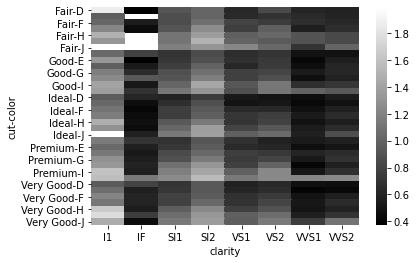

In [17]:
sns.heatmap(df_final_priced_carat,cmap="gray")

#Q1 The changed in cut and color of the diamond doesnot change the mean price of the diamond as long as the clarity remains same.

#Q2 Fair cut have the largest mean price.Here we can see that we IF and VVS1 clarity are less expensive when it comes to buying these diamond which provides a great options to choose between any color and cut of the diamond because the prices are also same in this case.

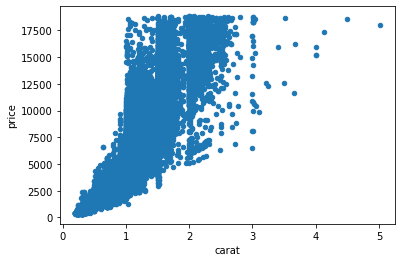

In [18]:
#Scatter plot
df.loc[:,["price","carat"]].plot(kind="scatter",x="carat",y="price")

Q1 Yes as the price increarses the size of the carat increases because we can
positive correlation between price and carat size from the above scatter plot.

### Section 2 Explore PDF and CDF with python and seaborn.

In [19]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
df.carat.unique().shape

(273,)

In [22]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [23]:
df_counts=pd.DataFrame(df["clarity"].value_counts())

In [24]:
df_counts

,clarity
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [25]:
df_counts.reset_index(level=0, inplace=True)

In [26]:
df_counts

,index,clarity
0,SI1,13065
1,VS2,12258
2,SI2,9194
3,VS1,8171
4,VVS2,5066
5,VVS1,3655
6,IF,1790
7,I1,741


In [27]:
df_counts_final=df_counts.rename(columns = {"index":"clarity",
                           "clarity":"count"}, inplace = False)

In [28]:
df_counts_final

,clarity,count
0,SI1,13065
1,VS2,12258
2,SI2,9194
3,VS1,8171
4,VVS2,5066
5,VVS1,3655
6,IF,1790
7,I1,741


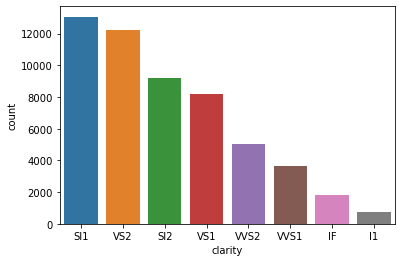

In [29]:
# Q1 Lets display the bar charts of the above data
sns.barplot(x="clarity",y="count",data=df_counts_final)

#2 The above bar chart compares the counts of different types of clarity of diamonds ."SI1"are the most common, followed by "VS2", "SI2 ","VS1","VVS2","VVS1","IF" and "I1". 

#3 The number of "SI1" clarity diamond is 13065 and the number of "IF" clarity diamond is 1790. So here the "SI1" clarity diamonds are about 7 times more common than "IF".

In [455]:
#Now lets seperate the data for "I1","IF","SI1" and "SI2" 
df_clarity_I1=df[df["clarity"]=="I1"]
df_clarity_IF=df[df["clarity"]=="IF"]
df_clarity_SI1=df[df["clarity"]=="SI1"]
df_clarity_SI2=df[df["clarity"]=="SI2"]

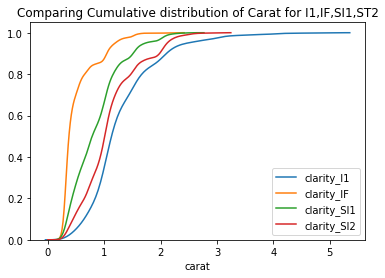

In [456]:
#Now lets plot together for comparsion.
plt.title("Comparing Cumulative distribution of Carat for I1,IF,SI1,ST2")
kwargs={"cumulative":True}
sns.distplot(df_clarity_I1["carat"],hist=False,hist_kws=kwargs,kde_kws=kwargs,label="clarity_I1")
sns.distplot(df_clarity_IF["carat"],hist=False,hist_kws=kwargs,kde_kws=kwargs,label="clarity_IF")
sns.distplot(df_clarity_SI1["carat"],hist=False,hist_kws=kwargs,kde_kws=kwargs,label="clarity_SI1")
sns.distplot(df_clarity_SI2["carat"],hist=False,hist_kws=kwargs,kde_kws=kwargs,label="clarity_SI2")

#Q1
The blue color curve in above plot which represnet clarity of "I1" has the largest relative distribution of high carat diamonds.

#Q2 The largest relative distribution of small diamonds is observed in diamonds with clarity of "IF".

#Q3 Yes here we can clearly see that as the diamond carat size increases the (form 3 to 5) the probability of occurence of diamond with clarity "IF" is almost equal to 1. Also clarity with "IF" seems more common for small carat diamonds.

#Q4 The two distributions with clarity of "SI1" and "SI2" looks most similar in above plot.

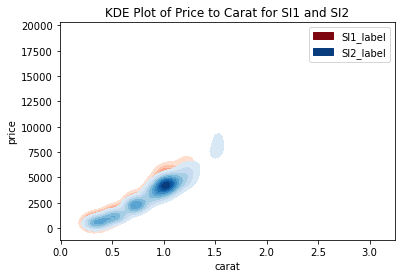

In [457]:
plt.title("KDE Plot of Price to Carat for SI1 and SI2")

# dataset X
sns.kdeplot(
        df_clarity_SI1["carat"],
        df_clarity_SI1["price"],
        cmap="Reds",
        shade=True,
        shade_lowest=False, label="SI1_label")

# dataset Y
sns.kdeplot(
        df_clarity_SI2["carat"],
        df_clarity_SI2["price"],
        cmap="Blues",
        shade=True,
        shade_lowest=False, label="SI2_label")

plt.legend()
plt.savefig("KDE_plot_SI1_SI2.png")

#Q1 The KDE plot shows the distribution of values across range of two variables. Here in plot we can see that carat and price have similar distribution.Both clarity have increased in price as the carat value increases. They have linear relation with both price and carat.

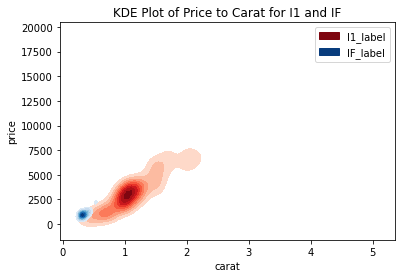

In [458]:
plt.title("KDE Plot of Price to Carat for I1 and IF")

# dataset X
sns.kdeplot(
        df_clarity_I1["carat"],
        df_clarity_I1["price"],
        cmap="Reds",
        shade=True,
        shade_lowest=False, label="I1_label")

# dataset Y
sns.kdeplot(
        df_clarity_IF["carat"],
        df_clarity_IF["price"],
        cmap="Blues",
        shade=True,
        shade_lowest=False, label="IF_label")

plt.legend()
plt.savefig("KDE_plot_I1_IF.png")

#Q2 The distribution of I1 and IF clarity diamond are not similar. Only I1 clarity have linear relationship with price and carat. The IF clarity is quite stable in price and carat. We cannot predict what will be the price of these type of diamond if we want to buy high carat value IF clarity diamond.

#Q3 In plot of SI1 and SI2 clarity diamonds we can see the price for these type diamonds of with 1 carat are almost equal. We may have to look for other factor like color inorder to choose between these two type of diamonds.

#Q4 Yes if clarity matters for purchasing the diamond then "I1" clarity have advantage. As we can see that I1 clarity diamonds price increases as the carat of the diamond increases too.But compared to other clarity diamond as seen in above KDE plot we can buy I1 clarity diamond with more carat value in less price.

In [34]:
df_clarity_I1=df[df["clarity"]=="I1"]
df_clarity_SI1=df[df["clarity"]=="SI1"]

In [35]:
#descriptive statistics for I1.
df_clarity_omitted_I1=df_clarity_I1.query("carat>0.95 and carat<1.05")
df_clarity_omitted_I1.describe()

,carat,depth,table,price,x,y,z
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1.004527,62.404054,58.486486,2695.344595,6.389730,6.337230,3.942162
std,0.022447,3.026929,2.543463,616.023508,0.144881,0.181546,0.344902
min,0.960000,56.100000,53.000000,1262.000000,5.720000,5.590000,0.000000
25%,1.000000,60.875000,57.000000,2188.000000,6.327500,6.257500,3.917500
50%,1.010000,61.700000,58.000000,2804.500000,6.410000,6.390000,3.975000
75%,1.020000,63.200000,60.000000,3178.750000,6.470000,6.450000,4.010000
max,1.040000,78.200000,66.000000,3987.000000,6.700000,6.690000,4.420000


In [36]:
#Q5 descriptive statistics for SI1
df_clarity_omitted_SI1=df_clarity_SI1.query("carat>0.95 and carat<1.05")
df_clarity_omitted_SI1.describe()

,carat,depth,table,price,x,y,z
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,1.011259,61.946140,58.245792,4866.168311,6.413059,6.408677,3.970563
std,0.014076,1.903765,2.298530,670.279307,0.107359,0.112512,0.072350
min,0.960000,43.000000,50.000000,2323.000000,6.000000,5.880000,3.660000
25%,1.000000,60.900000,57.000000,4460.000000,6.350000,6.350000,3.930000
50%,1.010000,62.100000,58.000000,4872.000000,6.410000,6.410000,3.980000
75%,1.020000,63.000000,60.000000,5301.000000,6.480000,6.480000,4.020000
max,1.040000,70.600000,67.000000,7564.000000,6.840000,6.770000,4.270000


#Q6 As we can clearly see that diamond with "SI1" clarity has mean carat around 1.011 with mean price 4866.16 .But in case of " I1" the mean carat was 1.004 with mean price 2695.344 . It means "SI2" is nearly 2 times more in price than "I1" clarity diamond. Hence we can say if clarity is important for buying diamond then "I1" is good to go.

# (30%) Explore distance and similarity measures in Pandas and Scikit-learn

In [461]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [460]:
#Now get the data of github
sample_github="sample_data.csv"
df_git=pd.read_csv(sample_github)
df_git

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.78,Ideal,D,SI1,62.4,57.0,3035,5.87,5.89,3.67
1,0.38,Ideal,G,VS1,62.4,54.0,759,4.63,4.67,2.90
2,0.75,Ideal,D,VS1,62.4,56.0,3961,5.79,5.84,3.63
3,1.12,Ideal,J,VS2,60.1,57.0,4422,6.82,6.75,4.08
4,0.54,Ideal,D,VS2,61.2,56.0,1939,5.29,5.23,3.22
5,1.15,Very Good,G,VS2,60.1,60.0,7175,6.75,6.80,4.08
6,0.41,Very Good,F,SI1,63.4,57.0,904,4.74,4.73,3.00
7,0.74,Ideal,G,SI1,61.6,55.0,2760,5.80,5.85,3.59
8,1.51,Fair,D,VS2,66.0,57.0,15152,7.17,7.08,4.70
9,0.31,Premium,J,VS1,60.7,60.0,408,4.34,4.39,2.65


In [358]:
#Now Lets merge with original dataset and create a new dataframe
df_merged_with_git=pd.concat([df_git,df], axis=0,ignore_index=True)

In [359]:
df_merged_with_git

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.78,Ideal,D,SI1,62.4,57.0,3035,5.87,5.89,3.67
1,0.38,Ideal,G,VS1,62.4,54.0,759,4.63,4.67,2.90
2,0.75,Ideal,D,VS1,62.4,56.0,3961,5.79,5.84,3.63
3,1.12,Ideal,J,VS2,60.1,57.0,4422,6.82,6.75,4.08
4,0.54,Ideal,D,VS2,61.2,56.0,1939,5.29,5.23,3.22
...,...,...,...,...,...,...,...,...,...,...
53950,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53951,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53952,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53953,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [360]:
#lets checck for NaN values in above dataframe
df_merged_with_git.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [361]:
#lets create dummies for 3 categorical columns
dummies_cut=pd.get_dummies(df_merged_with_git.cut)
dummies_color=pd.get_dummies(df_merged_with_git.color)
dummies_clarity=pd.get_dummies(df_merged_with_git.clarity)

In [362]:
df_merged_with_git_dummies=pd.concat([df_merged_with_git,dummies_cut,dummies_color,dummies_clarity],axis="columns")

In [462]:
df_merged_with_git_dummies.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.78,Ideal,D,SI1,62.4,57.0,3035,5.87,5.89,3.67,...,0,0,0,0,1,0,0,0,0,0
1,0.38,Ideal,G,VS1,62.4,54.0,759,4.63,4.67,2.90,...,0,0,0,0,0,0,1,0,0,0
2,0.75,Ideal,D,VS1,62.4,56.0,3961,5.79,5.84,3.63,...,0,0,0,0,0,0,1,0,0,0


In [364]:
#Now lets drop the columns cut,color and clarity
dropped_df_cut=df_merged_with_git_dummies.drop("cut",axis="columns")
dropped_df_color=dropped_df_cut.drop("color",axis="columns")
dropped_df_final=dropped_df_color.drop("clarity",axis="columns")

In [463]:
dropped_df_final.head(12)

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.78,62.4,57.0,3035,5.87,5.89,3.67,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.38,62.4,54.0,759,4.63,4.67,2.90,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.75,62.4,56.0,3961,5.79,5.84,3.63,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1.12,60.1,57.0,4422,6.82,6.75,4.08,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.54,61.2,56.0,1939,5.29,5.23,3.22,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1.15,60.1,60.0,7175,6.75,6.80,4.08,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.41,63.4,57.0,904,4.74,4.73,3.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0.74,61.6,55.0,2760,5.80,5.85,3.59,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.51,66.0,57.0,15152,7.17,7.08,4.70,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.31,60.7,60.0,408,4.34,4.39,2.65,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Here we are not dropping any dummies columns to avoid multicollinearity issue as sklearn library with figure it out itself. 

In [366]:
#Now lets normalized the above dataframe
dropped_df_final_norm=preprocessing.normalize(dropped_df_final.values)
dropped_df_final_norm

array([[0.0002569 , 0.02055207, 0.01877352, ..., 0.        , 0.        ,
        0.        ],
       [0.0004977 , 0.08172795, 0.07072611, ..., 0.        , 0.        ,
        0.        ],
       [0.0001893 , 0.01575003, 0.01413464, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00025377, 0.02276697, 0.02175188, ..., 0.        , 0.        ,
        0.        ],
       [0.00031179, 0.02211506, 0.02102743, ..., 0.        , 0.        ,
        0.        ],
       [0.00027191, 0.0225504 , 0.01994007, ..., 0.        , 0.        ,
        0.        ]])

In [433]:
#Now lets make the dataframe with normalised value
df_final_norm= pd.DataFrame(data=dropped_df_final_norm, index=dropped_df_final.index, columns=dropped_df_final.columns)
df_final_norm.head(13)

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.000257,0.020552,0.018774,0.999608,0.001933,0.001940,0.001209,0.000000,0.000000,0.000329,...,0.0,0.000000,0.0,0.000000,0.000329,0.0,0.000000,0.000000,0.0,0.00000
1,0.000498,0.081728,0.070726,0.994095,0.006064,0.006116,0.003798,0.000000,0.000000,0.001310,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.001310,0.000000,0.0,0.00000
2,0.000189,0.015750,0.014135,0.999773,0.001461,0.001474,0.000916,0.000000,0.000000,0.000252,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000252,0.000000,0.0,0.00000
3,0.000253,0.013589,0.012888,0.999822,0.001542,0.001526,0.000922,0.000000,0.000000,0.000226,...,0.0,0.000226,0.0,0.000000,0.000000,0.0,0.000000,0.000226,0.0,0.00000
4,0.000278,0.031534,0.028854,0.999077,0.002726,0.002695,0.001659,0.000000,0.000000,0.000515,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000515,0.0,0.00000
5,0.000160,0.008376,0.008362,0.999929,0.000941,0.000948,0.000569,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000139,0.0,0.00000
6,0.000452,0.069821,0.062772,0.995548,0.005220,0.005209,0.003304,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.001101,0.0,0.000000,0.000000,0.0,0.00000
7,0.000268,0.022309,0.019919,0.999547,0.002100,0.002119,0.001300,0.000000,0.000000,0.000362,...,0.0,0.000000,0.0,0.000000,0.000362,0.0,0.000000,0.000000,0.0,0.00000
8,0.000100,0.004356,0.003762,0.999983,0.000473,0.000467,0.000310,0.000066,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000066,0.0,0.00000
9,0.000744,0.145602,0.143923,0.978677,0.010410,0.010530,0.006357,0.000000,0.000000,0.000000,...,0.0,0.002399,0.0,0.000000,0.000000,0.0,0.002399,0.000000,0.0,0.00000


In [368]:
#Now lets create the sample datasets
df_sample=df_final_norm.sample(n=5400,random_state=0)

In [465]:
df_sample.head()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #2
52508,0.000238,0.024551,0.021977,0.999451,0.002126,0.002146,0.001327,0.0,0.000000,0.000396,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000396,0.0,0.075600
53291,0.000268,0.023242,0.021129,0.999501,0.002162,0.002173,0.001336,0.0,0.000000,0.000377,...,0.0,0.0,0.000000,0.000377,0.0,0.0,0.000000,0.000000,0.0,0.077137
39809,0.000291,0.056087,0.052810,0.997008,0.003988,0.003997,0.002458,0.0,0.000000,0.000000,...,0.0,0.0,0.000911,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.031705
7710,0.000234,0.015175,0.013094,0.999796,0.001459,0.001475,0.000952,0.0,0.000234,0.000000,...,0.0,0.0,0.000000,0.000234,0.0,0.0,0.000000,0.000000,0.0,0.088541
25633,0.000104,0.004163,0.004004,0.999983,0.000516,0.000510,0.000309,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000069,0.000000,0.0,0.102872


In [370]:
# Q1 and Q2 Lets save the sample_data in txt.to_csv("new_dogs_with_bmi.csv")
df_sample.to_csv("normalized_datasample_5400k.txt",index=False)

In [371]:
#Selecting second row of the data from "df_final_norm" for further processing
a=df_final_norm.iloc[1]
array_git=a.values.reshape(1,-1)
array_git.shape

(1, 27)

In [372]:
df_sample.values.shape

(5400, 27)

In [373]:
#Now lets find the 5 the five similar diamonds with #2(the 0.38 carat, Ideal, G, VS1, $759) which is in (2 row in "df_final_norm" dataframe above).
euclidean_distances(df_sample.values,array_git)

array([[0.07560032],
       [0.07713683],
       [0.0317049 ],
       ...,
       [0.08928127],
       [0.00504104],
       [0.08525632]])

In [374]:
df_sample['Similar with the #2'] = euclidean_distances(df_sample.values,array_git).squeeze()

In [375]:
df_sample

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #2
52508,0.000238,0.024551,0.021977,0.999451,0.002126,0.002146,0.001327,0.0,0.000000,0.000396,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000396,0.000000,0.075600
53291,0.000268,0.023242,0.021129,0.999501,0.002162,0.002173,0.001336,0.0,0.000000,0.000377,...,0.0,0.0,0.000000,0.000377,0.000000,0.000000,0.000000,0.000000,0.000000,0.077137
39809,0.000291,0.056087,0.052810,0.997008,0.003988,0.003997,0.002458,0.0,0.000000,0.000000,...,0.0,0.0,0.000911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031705
7710,0.000234,0.015175,0.013094,0.999796,0.001459,0.001475,0.000952,0.0,0.000234,0.000000,...,0.0,0.0,0.000000,0.000234,0.000000,0.000000,0.000000,0.000000,0.000000,0.088541
25633,0.000104,0.004163,0.004004,0.999983,0.000516,0.000510,0.000309,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000069,0.000000,0.000000,0.102872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,0.000100,0.003601,0.003343,0.999988,0.000449,0.000453,0.000277,0.0,0.000000,0.000059,...,0.0,0.0,0.000000,0.000000,0.000000,0.000059,0.000000,0.000000,0.000000,0.103729
37371,0.000406,0.063300,0.059851,0.996170,0.004737,0.004758,0.002962,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.001014,0.000000,0.000000,0.000000,0.021726
8453,0.000279,0.013360,0.014063,0.999809,0.001595,0.001581,0.000934,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000227,0.000000,0.000000,0.000000,0.000000,0.089281
30440,0.000436,0.083845,0.074862,0.993617,0.006003,0.006016,0.003702,0.0,0.000000,0.001361,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001361,0.005041


In [376]:
df_sample.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Fair', 'Good',
       'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2',
       'Similar with the #2'],
      dtype='object')

In [377]:
#Now lets take the 5 samllest distance from last column of the above data
df_sample.nsmallest(5,"Similar with the #2")

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #2
31519,0.000442,0.081733,0.071467,0.994045,0.005873,0.005782,0.003664,0.0,0.000000,0.001299,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001299,0.0,0.0,0.002031
31118,0.000541,0.081592,0.069974,0.994155,0.006350,0.006390,0.003934,0.0,0.000000,0.001320,...,0.0,0.0,0.0,0.000000,0.0,0.001320,0.000000,0.0,0.0,0.002055
31916,0.000384,0.081479,0.070461,0.994142,0.005522,0.005470,0.003497,0.0,0.001281,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.001281,0.000000,0.0,0.0,0.002076
31020,0.000518,0.081463,0.071762,0.994039,0.006286,0.006339,0.003867,0.0,0.000000,0.001329,...,0.0,0.0,0.0,0.001329,0.0,0.000000,0.000000,0.0,0.0,0.002175
30917,0.000520,0.080992,0.072052,0.994056,0.006325,0.006365,0.003856,0.0,0.000000,0.001334,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001334,0.0,0.0,0.002436


In [378]:
# Q3 The similar five diamonds are as folows
print(df_merged_with_git.iloc[31519])
print(df_merged_with_git.iloc[31118])
print(df_merged_with_git.iloc[31916])
print(df_merged_with_git.iloc[31020])
print(df_merged_with_git.iloc[30917])

carat       0.34
cut        Ideal
color          G
clarity      VS2
depth       62.9
table         55
price        765
x           4.52
y           4.45
z           2.82
Name: 31519, dtype: object
carat       0.41
cut        Ideal
color          I
clarity      VS1
depth       61.8
table         53
price        753
x           4.81
y           4.84
z           2.98
Name: 31118, dtype: object
carat       0.3
cut        Good
color         G
clarity     VS1
depth      63.6
table        55
price       776
x          4.31
y          4.27
z          2.73
Name: 31916, dtype: object
carat       0.39
cut        Ideal
color          G
clarity      SI1
depth       61.3
table         54
price        748
x           4.73
y           4.77
z           2.91
Name: 31020, dtype: object
carat       0.39
cut        Ideal
color          G
clarity      VS2
depth       60.7
table         54
price        745
x           4.74
y           4.77
z           2.89
Name: 30917, dtype: object


In [379]:
#Now lets drop the price the data below
df_final_price_dropped=dropped_df_final.drop("price",axis="columns")

In [380]:
#Now lets normalize the dataframe.
df_final_price_drop_norm=preprocessing.normalize(df_final_price_dropped.values)
df_final_price_drop_norm.shape

(53955, 26)

In [437]:
# Q2 Lets make dataframe of above
df_final_norm_price_drop= pd.DataFrame(data=df_final_price_drop_norm, index=df_final_price_dropped.index, columns=df_final_price_dropped.columns)
df_final_norm_price_drop.head()

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.009174,0.733915,0.670403,0.069040,0.069275,0.043165,0.0,0.0,0.011761,0.0,...,0.0,0.000000,0.0,0.0,0.011761,0.0,0.000000,0.000000,0.0,0.0
1,0.004586,0.753144,0.651760,0.055882,0.056365,0.035002,0.0,0.0,0.012070,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012070,0.000000,0.0,0.0
2,0.008892,0.739816,0.663937,0.068646,0.069239,0.043037,0.0,0.0,0.011856,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.011856,0.000000,0.0,0.0
3,0.013412,0.719671,0.682550,0.081666,0.080828,0.048856,0.0,0.0,0.011975,0.0,...,0.0,0.011975,0.0,0.0,0.000000,0.0,0.000000,0.011975,0.0,0.0
4,0.006477,0.734083,0.671710,0.063453,0.062733,0.038623,0.0,0.0,0.011995,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011995,0.0,0.0


In [438]:
#Now lets create the sample datasets
Sample_2=df_final_norm_price_drop.sample(n=5400,random_state=0)
Sample_2 
Sample_3=df_final_norm_price_drop.sample(n=5400,random_state=0)

In [439]:
#Selecting second row of the data from "df_final_norm" for further processing
series=df_final_norm_price_drop.iloc[1]
array_git_2=series.values.reshape(1,-1)
array_git_2.shape

(1, 26)

In [441]:
#Now lets find the 5 the five similar diamonds without the price
euclidean_distances(Sample_2.values,array_git_2)

array([[0.02722758],
       [0.03554671],
       [0.05148848],
       ...,
       [0.10728627],
       [0.02348133],
       [0.05061105]])

In [442]:
Sample_2['Similar with the #2'] = euclidean_distances(Sample_2.values,array_git_2).squeeze()

In [443]:
Sample_2

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #2
52508,0.007173,0.741198,0.663492,0.064197,0.064795,0.040049,0.0,0.000000,0.011955,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011955,0.000000,0.027228
53291,0.008478,0.735599,0.668726,0.068425,0.068783,0.042273,0.0,0.000000,0.011942,0.000000,...,0.0,0.0,0.000000,0.011942,0.000000,0.000000,0.000000,0.000000,0.000000,0.035547
39809,0.003769,0.725590,0.683185,0.051592,0.051710,0.031803,0.0,0.000000,0.000000,0.011779,...,0.0,0.0,0.011779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051488
7710,0.011588,0.752046,0.648915,0.072308,0.073119,0.047162,0.0,0.011588,0.000000,0.000000,...,0.0,0.0,0.000000,0.011588,0.000000,0.000000,0.000000,0.000000,0.000000,0.039957
25633,0.017757,0.713831,0.686603,0.088430,0.087483,0.053034,0.0,0.000000,0.000000,0.011838,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011838,0.000000,0.000000,0.078380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,0.020201,0.725357,0.673377,0.090374,0.091201,0.055760,0.0,0.000000,0.011814,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.011814,0.000000,0.000000,0.000000,0.065709
37371,0.004640,0.723907,0.684463,0.054177,0.054409,0.033875,0.0,0.000000,0.000000,0.011601,...,0.0,0.0,0.000000,0.000000,0.000000,0.011601,0.000000,0.000000,0.000000,0.049931
8453,0.014267,0.683191,0.719148,0.081542,0.080846,0.047789,0.0,0.000000,0.000000,0.011599,...,0.0,0.0,0.000000,0.000000,0.011599,0.000000,0.000000,0.000000,0.000000,0.107286
30440,0.003861,0.743246,0.663612,0.053210,0.053330,0.032819,0.0,0.000000,0.012066,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012066,0.023481


In [444]:
#Now lets take the 5 samllest distance from last column of the above data
dataframe_results=Sample_2.nsmallest(5,"Similar with the #2")
dataframe_results

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #2
29611,0.004217,0.754317,0.650689,0.054465,0.054947,0.034221,0.0,0.0,0.012050,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012050,0.0,0.0,0.0,0.002700
15063,0.003636,0.751436,0.654476,0.052116,0.052722,0.032481,0.0,0.0,0.012120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012120,0.0,0.0,0.0,0.006710
43615,0.003509,0.752576,0.653362,0.051180,0.051543,0.031942,0.0,0.0,0.012099,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012099,0.0,0.0,0.0,0.007667
45205,0.006134,0.754134,0.649494,0.061101,0.061341,0.038368,0.0,0.0,0.012028,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012028,0.0,0.0,0.0,0.008476
44891,0.006276,0.751953,0.651773,0.062160,0.062522,0.038865,0.0,0.0,0.012070,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012070,0.0,0.0,0.0,0.009824


In [445]:
# Q4 The similar five diamonds are as folows
print(df_merged_with_git.iloc[29611])
print(df_merged_with_git.iloc[15063])
print(df_merged_with_git.iloc[43615])
print(df_merged_with_git.iloc[45205])
print(df_merged_with_git.iloc[44891])

carat       0.35
cut        Ideal
color          G
clarity      VS1
depth       62.6
table         54
price        706
x           4.52
y           4.56
z           2.84
Name: 29611, dtype: object
carat        0.3
cut        Ideal
color          G
clarity      VS1
depth         62
table         54
price        605
x            4.3
y           4.35
z           2.68
Name: 15063, dtype: object
carat       0.29
cut        Ideal
color          G
clarity      VS1
depth       62.2
table         54
price        507
x           4.23
y           4.26
z           2.64
Name: 43615, dtype: object
carat       0.51
cut        Ideal
color          G
clarity      VS1
depth       62.7
table         54
price       1656
x           5.08
y            5.1
z           3.19
Name: 45205, dtype: object
carat       0.52
cut        Ideal
color          G
clarity      VS1
depth       62.3
table         54
price       1629
x           5.15
y           5.18
z           3.22
Name: 44891, dtype: object


#Q4 Here the price of these diamonds was ie between (500-1700 roughly). from above results we can that most of the 5 carat were around 0.51.

#Q5 Looking at the above five diamonds we can see that they have same cutting "Ideal", same color "G" and same clarity "VS1". They differ  very little in depth and major difference was seen on price.

In [447]:
#Q6 Selecting second row of the data from "df_final_norm" for further processing
series_3=df_final_norm_price_drop.iloc[13]
array_git_3=series_3.values.reshape(1,-1)
array_git_3.shape

(1, 26)

In [450]:
#Now lets find the 5 the five similar diamonds without the price
euclidean_distances(Sample_3.values,array_git_3)

array([[0.0378924 ],
       [0.03707014],
       [0.06657124],
       ...,
       [0.09659649],
       [0.05179132],
       [0.04577209]])

In [451]:
Sample_3['Similar with the #14'] = euclidean_distances(Sample_3.values,array_git_3).squeeze()

In [452]:
Sample_3

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #14
52508,0.007173,0.741198,0.663492,0.064197,0.064795,0.040049,0.0,0.000000,0.011955,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011955,0.000000,0.037892
53291,0.008478,0.735599,0.668726,0.068425,0.068783,0.042273,0.0,0.000000,0.011942,0.000000,...,0.0,0.0,0.000000,0.011942,0.000000,0.000000,0.000000,0.000000,0.000000,0.037070
39809,0.003769,0.725590,0.683185,0.051592,0.051710,0.031803,0.0,0.000000,0.000000,0.011779,...,0.0,0.0,0.011779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066571
7710,0.011588,0.752046,0.648915,0.072308,0.073119,0.047162,0.0,0.011588,0.000000,0.000000,...,0.0,0.0,0.000000,0.011588,0.000000,0.000000,0.000000,0.000000,0.000000,0.032271
25633,0.017757,0.713831,0.686603,0.088430,0.087483,0.053034,0.0,0.000000,0.000000,0.011838,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011838,0.000000,0.000000,0.051466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,0.020201,0.725357,0.673377,0.090374,0.091201,0.055760,0.0,0.000000,0.011814,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.011814,0.000000,0.000000,0.000000,0.041486
37371,0.004640,0.723907,0.684463,0.054177,0.054409,0.033875,0.0,0.000000,0.000000,0.011601,...,0.0,0.0,0.000000,0.000000,0.000000,0.011601,0.000000,0.000000,0.000000,0.062497
8453,0.014267,0.683191,0.719148,0.081542,0.080846,0.047789,0.0,0.000000,0.000000,0.011599,...,0.0,0.0,0.000000,0.000000,0.011599,0.000000,0.000000,0.000000,0.000000,0.096596
30440,0.003861,0.743246,0.663612,0.053210,0.053330,0.032819,0.0,0.000000,0.012066,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012066,0.051791


In [453]:
#Now lets take the 5 samllest distance from last column of the above data
dataframe_results_2=Sample_3.nsmallest(5,"Similar with the #14")
dataframe_results_2

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Similar with the #14
17097,0.012717,0.746075,0.654027,0.079210,0.079694,0.048931,0.0,0.0,0.012112,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012112,0.0,0.0,0.003425
17487,0.012202,0.747829,0.652387,0.077924,0.078407,0.048325,0.0,0.0,0.012081,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012081,0.0,0.0,0.005080
19185,0.014026,0.740879,0.659358,0.080801,0.081641,0.050231,0.0,0.0,0.011988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011988,0.0,0.0,0.009052
18349,0.012454,0.742438,0.658614,0.077477,0.078076,0.048258,0.0,0.0,0.011975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011975,0.0,0.0,0.009241
14490,0.011976,0.742510,0.658679,0.077006,0.077604,0.047904,0.0,0.0,0.011976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011976,0.0,0.0,0.009769


In [454]:
# Q4 The similar five diamonds are as folows
print(df_merged_with_git.iloc[17097])
print(df_merged_with_git.iloc[17487])
print(df_merged_with_git.iloc[19185])
print(df_merged_with_git.iloc[18349])
print(df_merged_with_git.iloc[14490])

carat       1.05
cut        Ideal
color          F
clarity      VS2
depth       61.6
table         54
price       6810
x           6.54
y           6.58
z           4.04
Name: 17097, dtype: object
carat       1.01
cut        Ideal
color          F
clarity      VS2
depth       61.9
table         54
price       7014
x           6.45
y           6.49
z              4
Name: 17487, dtype: object
carat       1.17
cut        Ideal
color          F
clarity      VS2
depth       61.8
table         55
price       7927
x           6.74
y           6.81
z           4.19
Name: 19185, dtype: object
carat       1.04
cut        Ideal
color          F
clarity      VS2
depth         62
table         55
price       7459
x           6.47
y           6.52
z           4.03
Name: 18349, dtype: object
carat          1
cut        Ideal
color          F
clarity      VS2
depth         62
table         55
price       5844
x           6.43
y           6.48
z              4
Name: 14490, dtype: object


#Q6 Here the price per carate in all 5 diamonds is betwen (6000- 7000) as we can see above the carat values of all these diamonds is nearly around 1. 

#Q7 The main similarity in above data is that they all have clarity "VS2" ,color "F" and cut "Ideal". The only differences is in price of these diamonds.

#Q8 The price column is dropped from the feature matrix because price has high value as compared to other features. Even if we normalized the while calculating euclidean distances price will dominant other features.Thus removing price can help in better understaning of similarity between featurs rows. 